In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/python_test_dataset_flights_6months.csv")
df.head()

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,2024-03-01,PayPal,Yes,369.648995,Web,confirmed,04-03-2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,2024-03-01,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,2024-03-01,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,2024-03-01,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,2024-03-01,Debit Card,Yes,727.341978,Web,confirmed,11-09-2023,0.000000,0.000000,No


In [21]:
df.rename(columns={'Coupon USed?': 'coupon_used'}, inplace=True)

In [19]:
df.describe()

,buyer_id,supplier_id,pax,costprice,markup,selling_price,booking_date,refund_amount,travel_date,cashback,coupon_redeem
count,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240,32240.000000,32240,32240.000000,32240.000000
mean,249.198728,4.132351,2.995440,534.454208,214.911897,749.185111,2024-05-27 19:59:07.295284992,321.169098,2024-01-07 08:15:28.138957568,1.800790,7.230413
min,1.000000,1.000000,1.000000,50.005653,-51.478750,50.766206,2024-03-01 00:00:00,0.000000,2023-01-01 00:00:00,0.000000,-5.147875
25%,123.000000,2.000000,2.000000,292.391617,78.381381,399.945463,2024-04-11 00:00:00,0.000000,2023-07-20 00:00:00,0.000000,0.000000
50%,248.000000,4.000000,3.000000,533.950333,171.356857,729.318731,2024-05-26 00:00:00,221.482908,2024-01-05 00:00:00,0.000000,0.000000
75%,374.000000,6.000000,4.000000,773.706987,305.323878,1062.007949,2024-07-13 00:00:00,593.005610,2024-07-18 00:00:00,0.000000,8.969851
max,499.000000,7.000000,5.000000,1150.283064,1197.747825,2126.801346,2024-08-31 00:00:00,1462.725105,2024-12-31 00:00:00,21.268013,91.593305
std,144.847428,1.987509,1.414173,280.406808,176.536047,414.305052,NaN,339.865111,NaN,3.790310,13.746741


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buyer_id            32240 non-null  int64         
 1   supplier_id         32240 non-null  int64         
 2   to_airport          32240 non-null  object        
 3   from_airport        32240 non-null  object        
 4   journey_type        32240 non-null  object        
 5   pax                 32240 non-null  int64         
 6   costprice           32240 non-null  float64       
 7   markup              32240 non-null  float64       
 8   selling_price       32240 non-null  float64       
 9   booking_date        32240 non-null  datetime64[ns]
 10  payment_method      32240 non-null  object        
 11  refund_status       32240 non-null  object        
 12  refund_amount       32240 non-null  float64       
 13  channel_of_booking  32240 non-null  object    

In [7]:
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['travel_date'] = pd.to_datetime(df['travel_date'], format='%d-%m-%Y')

In [8]:
df['booking_month'] = df['booking_date'].dt.to_period('M')
df['travel_month'] = df['travel_date'].dt.to_period('M')

In [9]:
monthly_sales = df.groupby('booking_month')['selling_price'].sum()
monthly_profits = df.groupby('booking_month')['markup'].sum()


In [11]:
refund_rate = df['refund_status'].value_counts(normalize=True)['Yes']


In [12]:
print("Monthly Sales (in currency units):\n", monthly_sales)
print("\nMonthly Profits (in currency units):\n", monthly_profits)
print(f"\nRefund Rate: {refund_rate:.2%}")

Monthly Sales (in currency units):
 booking_month
2024-03    4.464200e+06
2024-04    4.366291e+06
2024-05    3.876121e+06
2024-06    3.830474e+06
2024-07    3.894840e+06
2024-08    3.721802e+06
Freq: M, Name: selling_price, dtype: float64

Monthly Profits (in currency units):
 booking_month
2024-03    1.249428e+06
2024-04    1.235363e+06
2024-05    1.127896e+06
2024-06    1.112232e+06
2024-07    1.122317e+06
2024-08    1.081524e+06
Freq: M, Name: markup, dtype: float64

Refund Rate: 69.57%


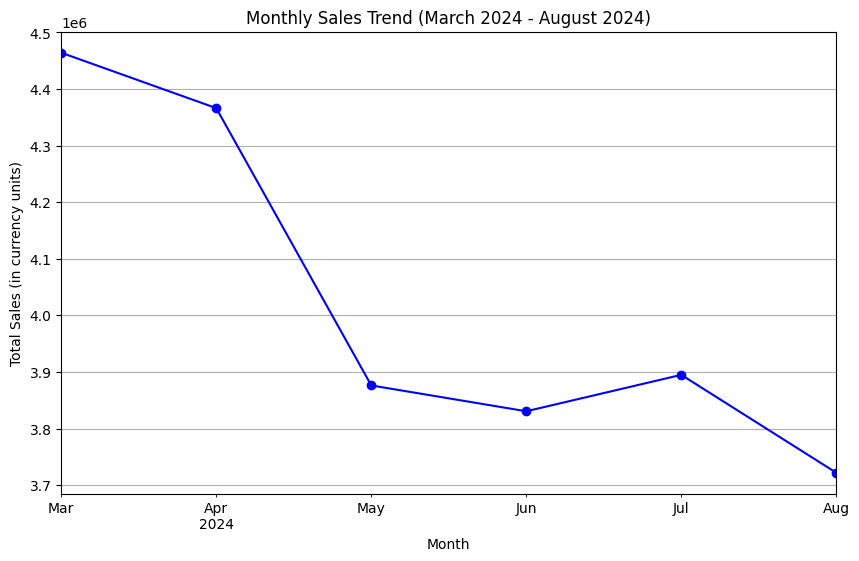

In [13]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend (March 2024 - August 2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales (in currency units)')
plt.grid(True)
plt.show()

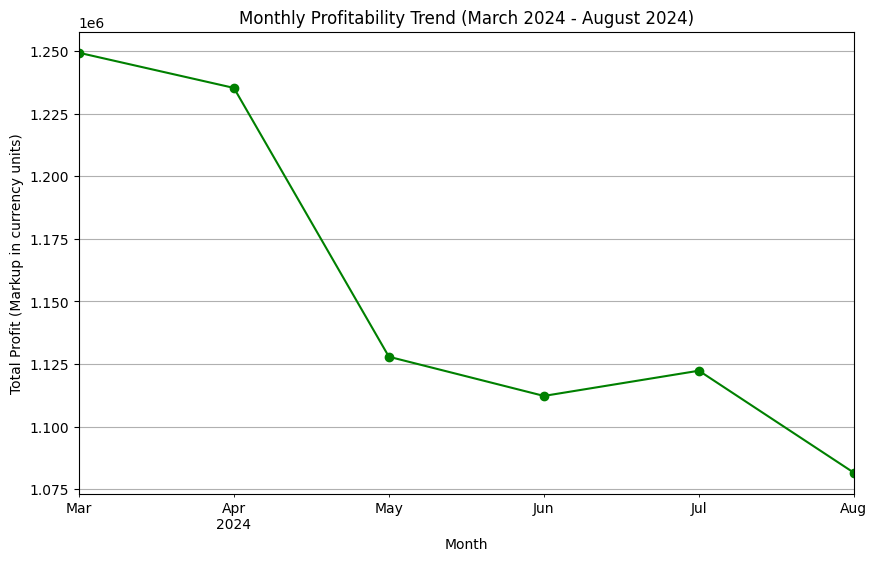

In [14]:
plt.figure(figsize=(10, 6))
monthly_profits.plot(kind='line', marker='o', color='green')
plt.title('Monthly Profitability Trend (March 2024 - August 2024)')
plt.xlabel('Month')
plt.ylabel('Total Profit (Markup in currency units)')
plt.grid(True)
plt.show()

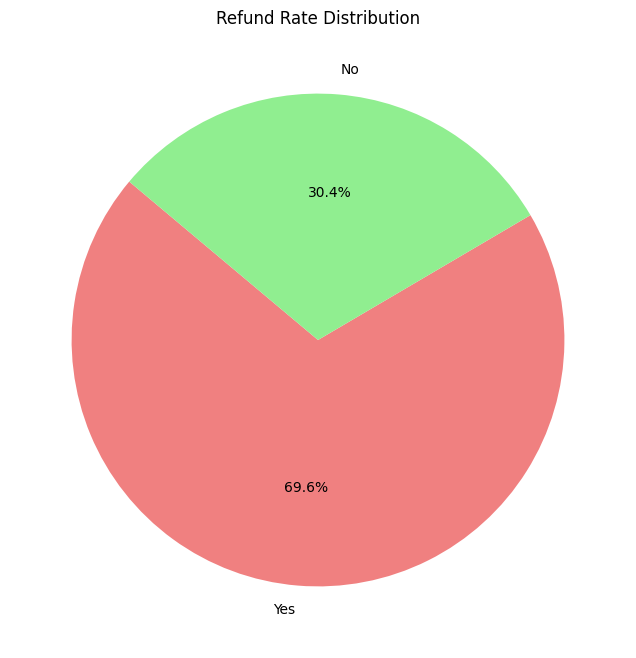

In [16]:
plt.figure(figsize=(8, 8))
refund_status_counts = df['refund_status'].value_counts()
plt.pie(refund_status_counts, labels=refund_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
plt.title('Refund Rate Distribution')
plt.show()

In [25]:
coupon_effect_sales = df.groupby('coupon_used')['selling_price'].sum()
coupon_effect_profit = df.groupby('coupon_used')['markup'].sum()
coupon_effect_sales, coupon_effect_profit

(coupon_used
 No     1.586873e+07
 Yes    8.284997e+06
 Name: selling_price, dtype: float64,
 coupon_used
 No     4.595963e+06
 Yes    2.332797e+06
 Name: markup, dtype: float64)

In [28]:
coupon_effect = df.groupby('coupon_used').agg({'selling_price': 'sum', 'markup': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
width = 0.35

<Figure size 1000x600 with 0 Axes>

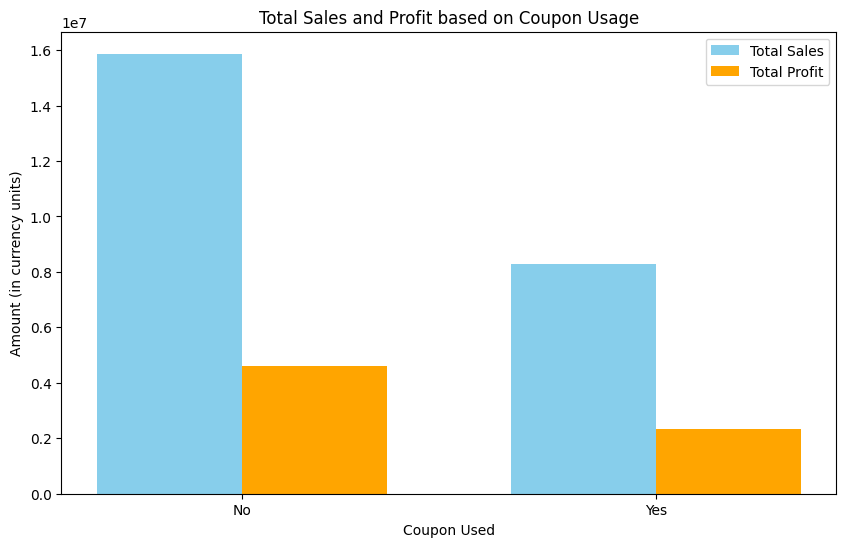

In [34]:
coupon_effect = df.groupby('coupon_used').agg({'selling_price': 'sum', 'markup': 'sum'}).reset_index()


width = 0.35
positions = np.arange(len(coupon_effect))


plt.figure(figsize=(10, 6))


plt.bar(positions - width/2, coupon_effect['selling_price'], width=width, label='Total Sales', color='skyblue')


plt.bar(positions + width/2, coupon_effect['markup'], width=width, label='Total Profit', color='orange')


plt.xlabel('Coupon Used')
plt.ylabel('Amount (in currency units)')
plt.title('Total Sales and Profit based on Coupon Usage')
plt.xticks(positions, coupon_effect['coupon_used'])
plt.legend()
plt.show()

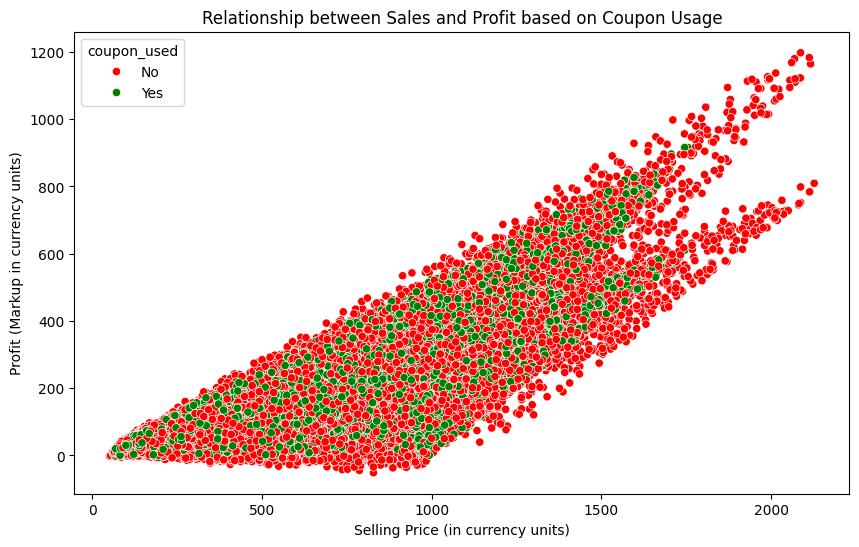

In [33]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='selling_price', y='markup', hue='coupon_used', palette=['red', 'green'])

plt.xlabel('Selling Price (in currency units)')
plt.ylabel('Profit (Markup in currency units)')
plt.title('Relationship between Sales and Profit based on Coupon Usage')
plt.show()

In [38]:
most_flights_from = df['from_airport'].value_counts()
most_flights_to = df['to_airport'].value_counts()
total_flights = most_flights_from.add(most_flights_to, fill_value=0)
most_flights_airport = total_flights.idxmax()
most_flights_count = total_flights.max()
print(f"Airport with the most flights (both arriving and departing): {most_flights_airport} with {most_flights_count} flights")

Airport with the most flights (both arriving and departing): DEL with 3969 flights


In [41]:
flight_pairs = df.groupby(['from_airport', 'to_airport']).size().reset_index(name='count')
most_frequent_pair = flight_pairs.loc[flight_pairs['count'].idxmax()]

from_airport = most_frequent_pair['from_airport']
to_airport = most_frequent_pair['to_airport']
flight_count = most_frequent_pair['count']

print(f"The most frequent journey is from {from_airport} to {to_airport} with {flight_count} flights")

The most frequent journey is from DEL to DEL with 158 flights


In [42]:
payment_method_counts = df['payment_method'].value_counts()
print("Count of each payment method:")
print(payment_method_counts)
num_unique_payment_methods = df['payment_method'].nunique()

print(f"\nTotal number of unique payment methods: {num_unique_payment_methods}")

Count of each payment method:
payment_method
PayPal           8113
Credit Card      8098
Bank Transfer    8026
Debit Card       8003
Name: count, dtype: int64

Total number of unique payment methods: 4


In [43]:
payment_method_counts = df['channel_of_booking'].value_counts()
print("Count of each channel of booking:")
print(payment_method_counts)
num_unique_payment_methods = df['channel_of_booking'].nunique()

print(f"\nTotal number of channel of booking: {num_unique_payment_methods}")

Count of each channel of booking:
channel_of_booking
Web        16120
Android     9672
iOS         6448
Name: count, dtype: int64

Total number of channel of booking: 3


In [44]:
payment_method_counts = df['buyer_id'].value_counts()
print("Count of buyer id:")
print(payment_method_counts)
num_unique_payment_methods = df['buyer_id'].nunique()

print(f"\nTotal number of buyer id: {num_unique_payment_methods}")

Count of buyer id:
buyer_id
92     102
119     91
216     87
444     87
132     86
      ... 
472     44
190     43
330     42
394     40
117     40
Name: count, Length: 499, dtype: int64

Total number of buyer id: 499


In [45]:
payment_method_counts = df['supplier_id'].value_counts()
print("Count of supplier id:")
print(payment_method_counts)
num_unique_payment_methods = df['supplier_id'].nunique()

print(f"\nTotal number of supplier id: {num_unique_payment_methods}")

Count of supplier id:
supplier_id
7    4971
5    4955
6    4880
2    4838
4    4799
1    3944
3    3853
Name: count, dtype: int64

Total number of supplier id: 7
